## Aim of the Project:
To classify the messages into ham and spam by 2 algorithms Naive Bayes and Random Forest. We also use NLP techniques like text pre-processing(tokenization,lemmatization,upper case conversion,etc), countvectorization,TFIDF and Word2vec.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re


## Data Pre-processing and EDA

In [2]:
df=pd.read_csv('spam.csv',encoding='latin1')


In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

## Label Encoding

In [5]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [6]:
df['Category']=label.fit_transform(df['Category'])

In [7]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.isnull().sum()

,0
Category,0
Message,0


## No Null Values found


In [9]:
print(df.duplicated().sum())

415


## 415 duplicated rows. Lets drop duplicates and keep only 1

In [10]:
df.drop_duplicates(keep='first',inplace=True)
df.reset_index(drop=True,inplace=True)

In [11]:
print(df.duplicated().sum())

0


In [12]:
df.shape

(5157, 2)

## EDA Basic

In [13]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df['Category'].value_counts()

,count
Category,
0,4516
1,641


## Pie Chart for visualising the balance in ham and spam

In [15]:
import matplotlib.pyplot as plt

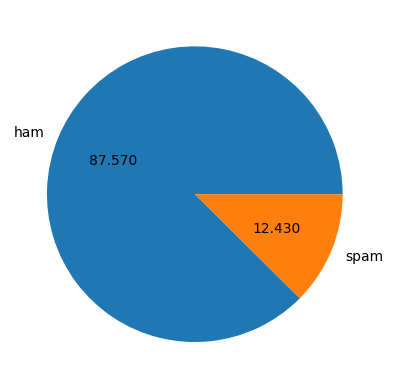

In [16]:
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct="%0.3f")
plt.show()

##Inference from Pie chart
The pie chart shows the data has more of ham mails than spam mails. That is, it is imbalanced data.

In [17]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [18]:
df['Message'].head()

,Message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."


## Char_count column added

In [19]:
df['Char_count']=df['Message'].apply(len)
df.head()

,Category,Message,Char_count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


## Word Tokenization

In [20]:
df['Message'].apply(lambda x:nltk.word_tokenize(x))

,Message
0,"[Go, until, jurong, point, ,, crazy, .., Avail..."
1,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,"[Nah, I, do, n't, think, he, goes, to, usf, ,,..."
...,...
5152,"[This, is, the, 2nd, time, we, have, tried, 2,..."
5153,"[Will, Ã¼, b, going, to, esplanade, fr, home, ?]"
5154,"[Pity, ,, *, was, in, mood, for, that, ., So, ..."
5155,"[The, guy, did, some, bitching, but, I, acted,..."


In [21]:
df['word_count']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Category,Message,Char_count,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


## Sentence Tokenization

In [22]:
df['Message'].apply(lambda x:nltk.sent_tokenize(x))

,Message
0,"[Go until jurong point, crazy.., Available onl..."
1,"[Ok lar..., Joking wif u oni...]"
2,[Free entry in 2 a wkly comp to win FA Cup fin...
3,[U dun say so early hor... U c already then sa...
4,"[Nah I don't think he goes to usf, he lives ar..."
...,...
5152,[This is the 2nd time we have tried 2 contact ...
5153,[Will Ã¼ b going to esplanade fr home?]
5154,"[Pity, * was in mood for that., So...any other..."
5155,[The guy did some bitching but I acted like i'...


In [23]:
df['sentences_num']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df.head()

,Category,Message,Char_count,word_count,sentences_num
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df[['Char_count','word_count','sentences_num']].describe(include='all')

,Char_count,word_count,sentences_num
count,5157.000000,5157.000000,5157.000000
mean,79.228040,18.544890,1.969750
std,58.451149,13.401415,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


## Stats for spam Messages

In [26]:
df[df['Category']==1][['Char_count','word_count','sentences_num']].describe(include='all')

,Char_count,word_count,sentences_num
count,641.000000,641.000000,641.000000
mean,137.541342,27.663027,2.970359
std,30.516111,7.104050,1.485575
min,7.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


## Stats for ham messages

In [27]:
df[df['Category']==0][['Char_count','word_count','sentences_num']].describe(include='all')

,Char_count,word_count,sentences_num
count,4516.000000,4516.000000,4516.000000
mean,70.951063,17.250664,1.827724
std,56.730031,13.581714,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
import seaborn as sns

In [29]:
df.head()

,Category,Message,Char_count,word_count,sentences_num
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


## Heatmap to understand feature correlation

<Axes: >

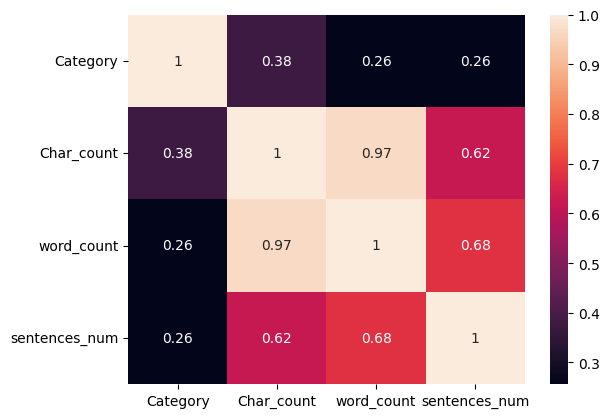

In [30]:
sns.heatmap(df[['Category','Char_count','word_count','sentences_num']].corr(),annot=True)

<Axes: xlabel='Char_count', ylabel='Count'>

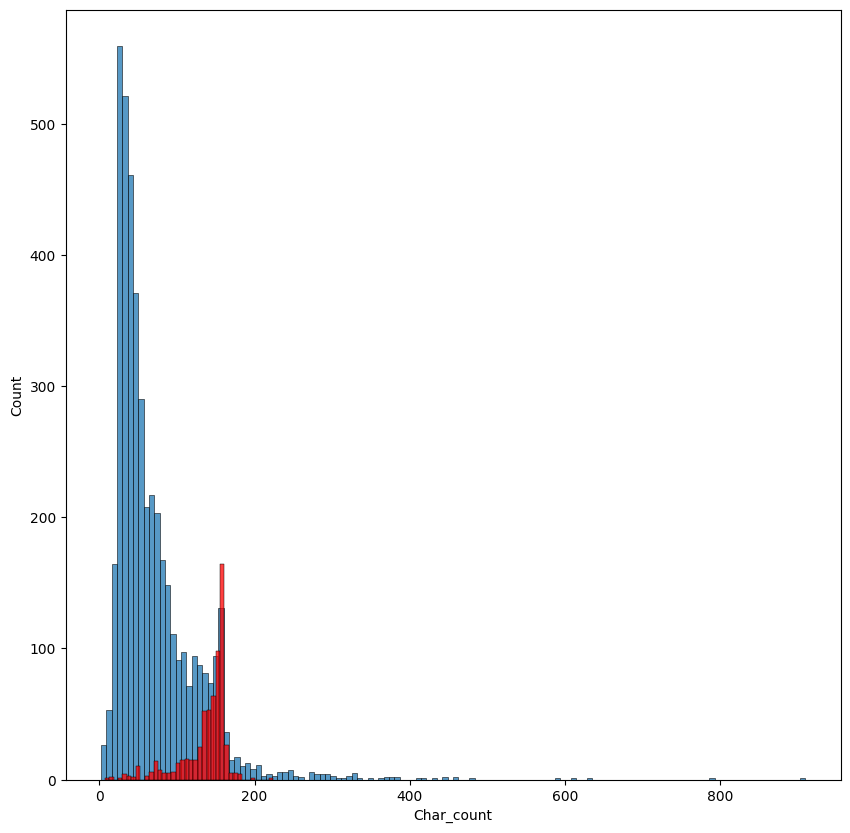

In [31]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.histplot(df[df['Category']==0]['Char_count'])
sns.histplot(df[df['Category']==1]['Char_count'],color='red')

## Further Data Pre-processing
1. LowerCase
2. Tokenization
3. Removing stopwords
4. Stemming

In [32]:
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
corpus=[]
for i in range(0,df['Message'].size):
  review=re.sub('[^a-zA-z]',' ',df['Message'][i])
  review=review.lower()
  review=review.split()
  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)

In [34]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

## Multiple Embedding Techniques(BoW,TfIdF)

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(corpus,df['Category'],test_size=0.20)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [37]:
## FOR Binary BoW model enable bianry=True
cv=CountVectorizer(max_features=3000)
tf=TfidfVectorizer(max_features=2500)

In [38]:
len(X_train),len(Y_train)

(4125, 4125)

In [39]:
X_train=cv.fit_transform(X_train).toarray()
X_test=cv.transform(X_test).toarray()

In [40]:
X_train[0:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Count Vectorizer vocabulary

In [41]:
cv.vocabulary_

{'say': 2112,
 'happen': 1009,
 'sac': 2089,
 'need': 1535,
 'carri': 362,
 'ah': 51,
 'well': 2766,
 'confus': 476,
 'thing': 2446,
 'doesnt': 639,
 'thought': 2455,
 'friend': 886,
 'mayb': 1395,
 'wrong': 2896,
 'alreadi': 77,
 'sort': 2269,
 'invit': 1156,
 'tho': 2452,
 'may': 1394,
 'come': 454,
 'co': 441,
 'money': 1469,
 'want': 2724,
 'sent': 2147,
 'lt': 1342,
 'gt': 986,
 'today': 2484,
 'that': 2442,
 'sorri': 2267,
 'hurt': 1096,
 'movi': 1490,
 'call': 335,
 'wat': 2732,
 'error': 737,
 'meet': 1405,
 'later': 1248,
 'good': 957,
 'afternoon': 43,
 'sunshin': 2360,
 'day': 557,
 'happi': 1011,
 'breath': 295,
 'air': 58,
 'smile': 2239,
 'think': 2447,
 'love': 1331,
 'alway': 82,
 'pussi': 1866,
 'perfect': 1672,
 'aight': 56,
 'ill': 1113,
 'get': 932,
 'fb': 807,
 'coupl': 505,
 'minut': 1438,
 'hous': 1077,
 'quit': 1889,
 'dark': 551,
 'liao': 1275,
 'rain': 1903,
 'got': 965,
 'excus': 767,
 'run': 2086,
 'rite': 2058,
 'hee': 1026,
 'great': 977,
 'princess': 1798

## Performing Naive Bayes

In [42]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,precision_score

In [43]:
mnb = MultinomialNB()
bnb = BernoulliNB()

In [44]:
mnb.fit(X_train,Y_train)
y_pred1 = mnb.predict(X_test)
print("Accuracy:", accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print("Precision:", precision_score(Y_test,y_pred1))

Accuracy: 0.9777131782945736
[[899  14]
 [  9 110]]
Precision: 0.8870967741935484


In [45]:
bnb.fit(X_train,Y_train)
y_pred1 = bnb.predict(X_test)
print("Accuracy:", accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print("Precision:", precision_score(Y_test,y_pred1))

Accuracy: 0.9777131782945736
[[911   2]
 [ 21  98]]
Precision: 0.98


## After trying multiple models Bernoulli Naive Bayes with Count_Vectorizer features=3000 is giving best results.

## Word2vec & AvgWord2vec
Word2vec is a technique in natural language processing (NLP) for obtaining vector representations of words.

word2vec is not a singular algorithm, rather, it is a family of model architectures and optimizations that can be used to learn word embeddings from large datasets. Embeddings learned through word2vec have proven to be successful on a variety of downstream natural language processing tasks.

We will train a Random Forest classifier by creating Word2vec from scratch.

In [46]:
!pip install gensim

In [47]:
import gensim
from gensim.models import Word2Vec, KeyedVectors
import gensim.downloader as api

import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [48]:
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


## Applying all the pre-processing techniques

In [49]:
corpus1 = []
for i in range(0, len(df['Message'])):
    review = re.sub('[^a-zA-Z]', ' ', df['Message'][i])
    review = review.lower()
    review = review.split()

    review = [lemmatizer.lemmatize(word) for word in review]
    review = ' '.join(review)
    corpus1.append(review)

In [50]:
[[i,j,k] for i,j,k in zip(list(map(len,corpus1)),corpus1, df['Message']) if i<1]

[[0, '', '645'], [0, '', ':)'], [0, '', ':-) :-)']]

In [51]:
corpus1

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
 'ok lar joking wif u oni',
 'free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s',
 'u dun say so early hor u c already then say',
 'nah i don t think he go to usf he life around here though',
 'freemsg hey there darling it s been week s now and no word back i d like some fun you up for it still tb ok xxx std chgs to send to rcv',
 'even my brother is not like to speak with me they treat me like aid patent',
 'a per your request melle melle oru minnaminunginte nurungu vettam ha been set a your callertune for all caller press to copy your friend callertune',
 'winner a a valued network customer you have been selected to receivea prize reward to claim call claim code kl valid hour only',
 'had your mobile month or more u r entitled to update to the latest colour mobile with camera for free call the mobile up

In [52]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

## Tokenization

In [53]:
words=[]
for sent in corpus1:
    sent_token=sent_tokenize(sent)
    for sent in sent_token:
        words.append(simple_preprocess(sent))

In [54]:
words

[['go',
  'until',
  'jurong',
  'point',
  'crazy',
  'available',
  'only',
  'in',
  'bugis',
  'great',
  'world',
  'la',
  'buffet',
  'cine',
  'there',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'oni'],
 ['free',
  'entry',
  'in',
  'wkly',
  'comp',
  'to',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  'st',
  'may',
  'text',
  'fa',
  'to',
  'to',
  'receive',
  'entry',
  'question',
  'std',
  'txt',
  'rate',
  'apply',
  'over'],
 ['dun', 'say', 'so', 'early', 'hor', 'already', 'then', 'say'],
 ['nah',
  'don',
  'think',
  'he',
  'go',
  'to',
  'usf',
  'he',
  'life',
  'around',
  'here',
  'though'],
 ['freemsg',
  'hey',
  'there',
  'darling',
  'it',
  'been',
  'week',
  'now',
  'and',
  'no',
  'word',
  'back',
  'like',
  'some',
  'fun',
  'you',
  'up',
  'for',
  'it',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'to',
  'send',
  'to',
  'rcv'],
 ['even',
  'my',
  'brother',
  'is',
  'not',
  'like',
  'to',
  'spea

## Training the word2vec

In [55]:
# Lets train Word2vec from scratch
model=gensim.models.Word2Vec(words)

# To Get All the Vocabulary
model.wv.index_to_key

['you',
 'to',
 'the',
 'and',
 'it',
 'in',
 'is',
 'me',
 'my',
 'for',
 'your',
 'that',
 'of',
 'have',
 'call',
 'on',
 'are',
 'now',
 'can',
 'so',
 'but',
 'not',
 'we',
 'or',
 'at',
 'get',
 'do',
 'be',
 'will',
 'if',
 'just',
 'no',
 'with',
 'ur',
 'this',
 'up',
 'how',
 'go',
 'gt',
 'lt',
 'what',
 'when',
 'from',
 'ok',
 'out',
 'all',
 'day',
 'know',
 'free',
 'like',
 'time',
 'll',
 'come',
 'got',
 'then',
 'good',
 'am',
 'he',
 'there',
 'wa',
 'want',
 'text',
 'love',
 'only',
 'need',
 'one',
 'send',
 'going',
 'by',
 'today',
 'lor',
 'home',
 'don',
 'txt',
 'about',
 'stop',
 'see',
 'still',
 'back',
 'take',
 'she',
 'da',
 'think',
 'dont',
 'reply',
 'hi',
 'tell',
 'our',
 'mobile',
 'any',
 'they',
 'sorry',
 'new',
 'phone',
 'please',
 'week',
 'did',
 'here',
 'night',
 'her',
 'make',
 'been',
 're',
 'co',
 'ha',
 'some',
 'well',
 'msg',
 'an',
 'min',
 'where',
 'thing',
 'hey',
 'much',
 'hope',
 'oh',
 'say',
 'too',
 'give',
 'him',
 'gr

In [56]:
model.corpus_count

5154

In [57]:
model.epochs

5

In [58]:
words[0]

['go',
 'until',
 'jurong',
 'point',
 'crazy',
 'available',
 'only',
 'in',
 'bugis',
 'great',
 'world',
 'la',
 'buffet',
 'cine',
 'there',
 'got',
 'amore',
 'wat']

## Applying the word2vec

In [59]:
def avg_word2vec(doc):
    words=[model.wv[word] for word in doc if word in model.wv.index_to_key]
    return np.mean(words,axis=0) if len(words)>0 else np.zeros(model.vector_size)


In [60]:
!pip install tqdm

In [61]:
from tqdm import tqdm

In [62]:
#apply for the entire sentences
import numpy as np
X=[]
for i in tqdm(range(len(words))):
    X.append(avg_word2vec(words[i]))

100%|██████████| 5154/5154 [00:01<00:00, 4230.78it/s]


In [63]:
len(X)

5154

In [64]:
## Dependent Features
## Output Features
y = df[list(map(lambda x: len(x)>0 ,corpus1))]
y=pd.get_dummies(y['Category'])
y=y.iloc[:,0].values

In [65]:
data=pd.DataFrame(np.vstack(X))



In [66]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.048970,0.177730,0.042459,-0.081047,0.105348,-0.554936,0.085231,0.526539,-0.119033,-0.212667,...,0.285559,0.233438,0.036927,0.015587,0.324258,0.339005,0.145110,-0.153975,0.023919,-0.069396
1,-0.050123,0.155991,0.037468,-0.072506,0.092107,-0.508219,0.078817,0.485086,-0.107182,-0.192509,...,0.266774,0.213809,0.031405,0.017608,0.304887,0.307787,0.132799,-0.142318,0.025285,-0.065173
2,-0.049005,0.184779,0.051908,-0.100287,0.111161,-0.570151,0.060018,0.527739,-0.112642,-0.221541,...,0.281218,0.231289,0.062012,0.009711,0.301084,0.328226,0.167247,-0.166030,0.013875,-0.067238
3,-0.066347,0.240945,0.054383,-0.099799,0.138479,-0.759984,0.127122,0.730210,-0.169328,-0.284368,...,0.396839,0.317829,0.045232,0.024501,0.461437,0.462745,0.192547,-0.208840,0.039777,-0.097911
4,-0.061521,0.204609,0.047364,-0.092884,0.125025,-0.643472,0.106811,0.615645,-0.141162,-0.241435,...,0.336575,0.269067,0.042866,0.019751,0.385769,0.395541,0.165258,-0.180369,0.027097,-0.081975


In [67]:
data['output']=y

In [68]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,output
0,-0.048970,0.177730,0.042459,-0.081047,0.105348,-0.554936,0.085231,0.526539,-0.119033,-0.212667,...,0.233438,0.036927,0.015587,0.324258,0.339005,0.145110,-0.153975,0.023919,-0.069396,True
1,-0.050123,0.155991,0.037468,-0.072506,0.092107,-0.508219,0.078817,0.485086,-0.107182,-0.192509,...,0.213809,0.031405,0.017608,0.304887,0.307787,0.132799,-0.142318,0.025285,-0.065173,True
2,-0.049005,0.184779,0.051908,-0.100287,0.111161,-0.570151,0.060018,0.527739,-0.112642,-0.221541,...,0.231289,0.062012,0.009711,0.301084,0.328226,0.167247,-0.166030,0.013875,-0.067238,False
3,-0.066347,0.240945,0.054383,-0.099799,0.138479,-0.759984,0.127122,0.730210,-0.169328,-0.284368,...,0.317829,0.045232,0.024501,0.461437,0.462745,0.192547,-0.208840,0.039777,-0.097911,True
4,-0.061521,0.204609,0.047364,-0.092884,0.125025,-0.643472,0.106811,0.615645,-0.141162,-0.241435,...,0.269067,0.042866,0.019751,0.385769,0.395541,0.165258,-0.180369,0.027097,-0.081975,True


In [69]:
data.dropna(inplace=True)
data.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
96,0
97,0
98,0
99,0


In [70]:
X=data

In [71]:
y=data['output']

## Train-Test-Split

In [72]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [73]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,output
4141,-0.060765,0.214053,0.048528,-0.096300,0.124959,-0.685524,0.114478,0.649939,-0.150086,-0.256492,...,0.282640,0.042540,0.025476,0.404801,0.415694,0.172767,-0.192810,0.036871,-0.090212,True
3279,-0.055073,0.192666,0.051281,-0.070411,0.115436,-0.579302,0.109642,0.551468,-0.125092,-0.211866,...,0.246785,0.050333,0.014917,0.357533,0.359205,0.161777,-0.157977,0.032530,-0.077261,True
854,-0.052280,0.195685,0.054875,-0.105478,0.113602,-0.611665,0.074958,0.568028,-0.123006,-0.234024,...,0.253097,0.057703,0.014464,0.329550,0.354148,0.171139,-0.173078,0.019765,-0.071581,False
4408,-0.052367,0.188456,0.043694,-0.085327,0.103229,-0.581874,0.093345,0.555981,-0.132755,-0.216044,...,0.245468,0.041564,0.018489,0.350192,0.349968,0.154613,-0.156033,0.023276,-0.076146,True
1518,-0.068784,0.235201,0.059777,-0.104233,0.137837,-0.751167,0.123331,0.709380,-0.164159,-0.280403,...,0.314734,0.052153,0.023257,0.441158,0.450914,0.182635,-0.211680,0.031720,-0.094879,True


In [74]:
y_train

,output
4141,True
3279,True
854,False
4408,True
1518,True
...,...
1056,True
2389,True
2622,True
819,False


## Random Forest Classifier

In [75]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
X_train.columns = X_train.columns.astype(str)
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [76]:
X_test.columns = X_test.columns.astype(str)
y_pred7=classifier.predict(X_test)

In [77]:
print("Accuracy:", accuracy_score(y_test,y_pred7))
print(confusion_matrix(y_test,y_pred7))
print("Precision:", precision_score(y_test,y_pred7))



Accuracy: 1.0
[[122   0]
 [  0 909]]
Precision: 1.0


In [78]:
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       122
        True       1.00      1.00      1.00       909

    accuracy                           1.00      1031
   macro avg       1.00      1.00      1.00      1031
weighted avg       1.00      1.00      1.00      1031



We Got some amazing results from our Random Forest model by training a word2vec from scratch. We got an accuracy of 100% and a precision of 100% which is greatest so far.

# Conclusion:
In this project, Text Classification for Spam Detection we worked through a series of tasks such as Data Collection, Data Preprocessing, EDA and Modeling. We performed different NLP techniques and created three models:
- Naive Bayse
We Created a Naive Bayse model using Bag of Words (BoW), Multinomial Naive Bayes model using CountVectorizer with Max_features = 3000 gave the best results with an Accuracy of 98% and Precision of 98%.
- Random Forest
We Got some amazing results from our Random Forest model by training a word2vec from scratch. We got an Accuracy of 100% and a Precision of 100%.